<a href="https://colab.research.google.com/github/maswadkar/python/blob/master/pandas_001_10_minutes_to_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Object creation

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.4.3'

In [2]:
#Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1,2,np.nan,4])
s

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

In [3]:
#Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range(start='20000101',periods=6,)
dates


DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['A','B','C','D',])
df

,A,B,C,D
2000-01-01,1.355288,0.089150,1.042699,-1.287231
2000-01-02,0.913036,0.364387,-0.546908,-0.249352
2000-01-03,1.013353,-0.693138,-0.398182,-0.157842
2000-01-04,0.857274,-0.627580,-0.648772,0.009246
2000-01-05,1.541676,0.945272,-0.105714,-0.981620
2000-01-06,1.181623,-0.325192,0.073726,0.775451


In [5]:
#Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure:
df2 = pd.DataFrame({'A':1,
                   'B':pd.Timestamp('20220202'),
                   'C':pd.Series(1, index=list(range(4)), dtype="float32"),
                   'D':np.array([3]*4,dtype='float32'),
                   'E':pd.Categorical(['test','train','test','train']),
                   'F':'foo'
                   })
df2

,A,B,C,D,E,F
0,1,2022-02-02,1.0,3.0,test,foo
1,1,2022-02-02,1.0,3.0,train,foo
2,1,2022-02-02,1.0,3.0,test,foo
3,1,2022-02-02,1.0,3.0,train,foo


In [6]:
#The columns of the resulting DataFrame have different dtypes:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D           float32
E          category
F            object
dtype: object

#Viewing data

In [7]:
#Here is how to view the top and bottom rows of the frame:
df.head()

,A,B,C,D
2000-01-01,1.355288,0.089150,1.042699,-1.287231
2000-01-02,0.913036,0.364387,-0.546908,-0.249352
2000-01-03,1.013353,-0.693138,-0.398182,-0.157842
2000-01-04,0.857274,-0.627580,-0.648772,0.009246
2000-01-05,1.541676,0.945272,-0.105714,-0.981620


In [8]:
df.tail(3)

,A,B,C,D
2000-01-04,0.857274,-0.627580,-0.648772,0.009246
2000-01-05,1.541676,0.945272,-0.105714,-0.981620
2000-01-06,1.181623,-0.325192,0.073726,0.775451


In [9]:
#Display the index, columns:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

 [DataFrame.to_numpy()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

In [11]:
#For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data:
df.to_numpy()

array([[ 1.3552885 ,  0.08914987,  1.04269934, -1.28723072],
       [ 0.91303616,  0.36438683, -0.54690838, -0.24935239],
       [ 1.01335301, -0.69313815, -0.39818238, -0.1578418 ],
       [ 0.85727402, -0.62757951, -0.64877162,  0.00924602],
       [ 1.54167638,  0.94527214, -0.10571403, -0.98162039],
       [ 1.18162313, -0.3251924 ,  0.07372595,  0.77545057]])

In [12]:
#For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive:
df2.to_numpy()

array([[1, Timestamp('2022-02-02 00:00:00'), 1.0, 3.0, 'test', 'foo'],
       [1, Timestamp('2022-02-02 00:00:00'), 1.0, 3.0, 'train', 'foo'],
       [1, Timestamp('2022-02-02 00:00:00'), 1.0, 3.0, 'test', 'foo'],
       [1, Timestamp('2022-02-02 00:00:00'), 1.0, 3.0, 'train', 'foo']],
      dtype=object)

In [13]:
#describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,1.143709,-0.041184,-0.097192,-0.315225
std,0.267144,0.633109,0.620599,0.736592
min,0.857274,-0.693138,-0.648772,-1.287231
25%,0.938115,-0.551983,-0.509727,-0.798553
50%,1.097488,-0.118021,-0.251948,-0.203597
75%,1.311872,0.295578,0.028866,-0.032526
max,1.541676,0.945272,1.042699,0.775451


In [14]:
#Transposing your data:
df.T

,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05,2000-01-06
A,1.355288,0.913036,1.013353,0.857274,1.541676,1.181623
B,0.089150,0.364387,-0.693138,-0.627580,0.945272,-0.325192
C,1.042699,-0.546908,-0.398182,-0.648772,-0.105714,0.073726
D,-1.287231,-0.249352,-0.157842,0.009246,-0.981620,0.775451


In [15]:
#Sorting by an axis:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2000-01-01,-1.287231,1.042699,0.089150,1.355288
2000-01-02,-0.249352,-0.546908,0.364387,0.913036
2000-01-03,-0.157842,-0.398182,-0.693138,1.013353
2000-01-04,0.009246,-0.648772,-0.627580,0.857274
2000-01-05,-0.981620,-0.105714,0.945272,1.541676
2000-01-06,0.775451,0.073726,-0.325192,1.181623


In [16]:
#Sorting by values:
df.sort_values(by='B',ascending=False)

,A,B,C,D
2000-01-05,1.541676,0.945272,-0.105714,-0.981620
2000-01-02,0.913036,0.364387,-0.546908,-0.249352
2000-01-01,1.355288,0.089150,1.042699,-1.287231
2000-01-06,1.181623,-0.325192,0.073726,0.775451
2000-01-04,0.857274,-0.627580,-0.648772,0.009246
2000-01-03,1.013353,-0.693138,-0.398182,-0.157842


#Selection

## Getting

In [17]:
#Selecting a single column, which yields a Series, equivalent to df.A:
df['A']

2000-01-01    1.355288
2000-01-02    0.913036
2000-01-03    1.013353
2000-01-04    0.857274
2000-01-05    1.541676
2000-01-06    1.181623
Freq: D, Name: A, dtype: float64

In [18]:
#Selecting via [], which slices the rows:
df[0:3]

,A,B,C,D
2000-01-01,1.355288,0.089150,1.042699,-1.287231
2000-01-02,0.913036,0.364387,-0.546908,-0.249352
2000-01-03,1.013353,-0.693138,-0.398182,-0.157842


## Selection by label

In [19]:
#For getting a cross section using a label:
df.loc[dates[0]]

A    1.355288
B    0.089150
C    1.042699
D   -1.287231
Name: 2000-01-01 00:00:00, dtype: float64

In [20]:
#Selecting on a multi-axis by label:
df.loc[:,['A','C']]

,A,C
2000-01-01,1.355288,1.042699
2000-01-02,0.913036,-0.546908
2000-01-03,1.013353,-0.398182
2000-01-04,0.857274,-0.648772
2000-01-05,1.541676,-0.105714
2000-01-06,1.181623,0.073726


In [21]:
#Showing label slicing, both endpoints are included:
df.loc['2000-01-02':'2000-01-05',['A','C']]

,A,C
2000-01-02,0.913036,-0.546908
2000-01-03,1.013353,-0.398182
2000-01-04,0.857274,-0.648772
2000-01-05,1.541676,-0.105714


In [22]:
#Reduction in the dimensions of the returned object:
df.loc['2000-01-02',['A','C']]

A    0.913036
C   -0.546908
Name: 2000-01-02 00:00:00, dtype: float64

In [23]:
#For getting a scalar value:
df.loc[dates[0],'D']

-1.2872307217158792

In [24]:
#For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0],'B']

0.08914986748357374

##Selection by position

In [25]:
#Select via the position of the passed integers:
df.iloc[3]

A    0.857274
B   -0.627580
C   -0.648772
D    0.009246
Name: 2000-01-04 00:00:00, dtype: float64

In [26]:
#By integer slices, acting similar to NumPy/Python:
df.iloc[0:2,1:3]

,B,C
2000-01-01,0.089150,1.042699
2000-01-02,0.364387,-0.546908


In [27]:
#By lists of integer position locations, similar to the NumPy/Python style:
df.iloc[[1,5],[0,2]]

,A,C
2000-01-02,0.913036,-0.546908
2000-01-06,1.181623,0.073726


In [28]:
#For slicing rows explicitly:
df.iloc[3:4,:]

,A,B,C,D
2000-01-04,0.857274,-0.62758,-0.648772,0.009246


In [29]:
#For slicing columns explicitly:
df.iloc[:,2:3]

,C
2000-01-01,1.042699
2000-01-02,-0.546908
2000-01-03,-0.398182
2000-01-04,-0.648772
2000-01-05,-0.105714
2000-01-06,0.073726


In [30]:
#For getting a value explicitly:
df.iloc[2,2]

-0.3981823788747346

##Boolean indexing

In [31]:
#Using a single column’s values to select data:
df[df['A'] > 0.7]

,A,B,C,D
2000-01-01,1.355288,0.089150,1.042699,-1.287231
2000-01-02,0.913036,0.364387,-0.546908,-0.249352
2000-01-03,1.013353,-0.693138,-0.398182,-0.157842
2000-01-04,0.857274,-0.627580,-0.648772,0.009246
2000-01-05,1.541676,0.945272,-0.105714,-0.981620
2000-01-06,1.181623,-0.325192,0.073726,0.775451


In [32]:
#Selecting values from a DataFrame where a boolean condition is met:
df[df > 0.5]

,A,B,C,D
2000-01-01,1.355288,NaN,1.042699,NaN
2000-01-02,0.913036,NaN,NaN,NaN
2000-01-03,1.013353,NaN,NaN,NaN
2000-01-04,0.857274,NaN,NaN,NaN
2000-01-05,1.541676,0.945272,NaN,NaN
2000-01-06,1.181623,NaN,NaN,0.775451


In [33]:
#Using the isin() method for filtering:
df2 = df.copy()
df2['E'] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2000-01-01,1.355288,0.089150,1.042699,-1.287231,one
2000-01-02,0.913036,0.364387,-0.546908,-0.249352,one
2000-01-03,1.013353,-0.693138,-0.398182,-0.157842,two
2000-01-04,0.857274,-0.627580,-0.648772,0.009246,three
2000-01-05,1.541676,0.945272,-0.105714,-0.981620,four
2000-01-06,1.181623,-0.325192,0.073726,0.775451,three


In [34]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2000-01-03,1.013353,-0.693138,-0.398182,-0.157842,two
2000-01-05,1.541676,0.945272,-0.105714,-0.981620,four


##Setting

In [35]:
#Setting a new column automatically aligns the data by the indexes:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20000101", periods=6))
df["F"] = s1

In [36]:
df

,A,B,C,D,F
2000-01-01,1.355288,0.089150,1.042699,-1.287231,1
2000-01-02,0.913036,0.364387,-0.546908,-0.249352,2
2000-01-03,1.013353,-0.693138,-0.398182,-0.157842,3
2000-01-04,0.857274,-0.627580,-0.648772,0.009246,4
2000-01-05,1.541676,0.945272,-0.105714,-0.981620,5
2000-01-06,1.181623,-0.325192,0.073726,0.775451,6


In [37]:
#Setting values by label:
df.loc[dates[0],'A'] = 0.333333
df

,A,B,C,D,F
2000-01-01,0.333333,0.089150,1.042699,-1.287231,1
2000-01-02,0.913036,0.364387,-0.546908,-0.249352,2
2000-01-03,1.013353,-0.693138,-0.398182,-0.157842,3
2000-01-04,0.857274,-0.627580,-0.648772,0.009246,4
2000-01-05,1.541676,0.945272,-0.105714,-0.981620,5
2000-01-06,1.181623,-0.325192,0.073726,0.775451,6


In [38]:
#Setting values by position:
df.iat[0,3] = .444444
df

,A,B,C,D,F
2000-01-01,0.333333,0.089150,1.042699,0.444444,1
2000-01-02,0.913036,0.364387,-0.546908,-0.249352,2
2000-01-03,1.013353,-0.693138,-0.398182,-0.157842,3
2000-01-04,0.857274,-0.627580,-0.648772,0.009246,4
2000-01-05,1.541676,0.945272,-0.105714,-0.981620,5
2000-01-06,1.181623,-0.325192,0.073726,0.775451,6


In [39]:
#Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2000-01-01,0.333333,0.089150,1.042699,5,1
2000-01-02,0.913036,0.364387,-0.546908,5,2
2000-01-03,1.013353,-0.693138,-0.398182,5,3
2000-01-04,0.857274,-0.627580,-0.648772,5,4
2000-01-05,1.541676,0.945272,-0.105714,5,5
2000-01-06,1.181623,-0.325192,0.073726,5,6


In [40]:
#A where operation with setting:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2000-01-01,-0.333333,-0.089150,-1.042699,-5,-1
2000-01-02,-0.913036,-0.364387,-0.546908,-5,-2
2000-01-03,-1.013353,-0.693138,-0.398182,-5,-3
2000-01-04,-0.857274,-0.627580,-0.648772,-5,-4
2000-01-05,-1.541676,-0.945272,-0.105714,-5,-5
2000-01-06,-1.181623,-0.325192,-0.073726,-5,-6


#Missing data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the Missing Data section.



In [41]:
#Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2000-01-01,0.333333,0.089150,1.042699,5,1,1.0
2000-01-02,0.913036,0.364387,-0.546908,5,2,1.0
2000-01-03,1.013353,-0.693138,-0.398182,5,3,NaN
2000-01-04,0.857274,-0.627580,-0.648772,5,4,NaN


In [42]:
#To drop any rows that have missing data:
df1.dropna(how="any")

,A,B,C,D,F,E
2000-01-01,0.333333,0.089150,1.042699,5,1,1.0
2000-01-02,0.913036,0.364387,-0.546908,5,2,1.0


In [43]:
#Filling missing data:
df1.fillna(5)

,A,B,C,D,F,E
2000-01-01,0.333333,0.089150,1.042699,5,1,1.0
2000-01-02,0.913036,0.364387,-0.546908,5,2,1.0
2000-01-03,1.013353,-0.693138,-0.398182,5,3,5.0
2000-01-04,0.857274,-0.627580,-0.648772,5,4,5.0


In [44]:
#to get the boolean mask where values are nan:
df1.isna()

,A,B,C,D,F,E
2000-01-01,False,False,False,False,False,False
2000-01-02,False,False,False,False,False,False
2000-01-03,False,False,False,False,False,True
2000-01-04,False,False,False,False,False,True


#Operations

##Stats

Operations in general exclude missing data

In [45]:
df.mean()

A    0.973383
B   -0.041184
C   -0.097192
D    5.000000
F    3.500000
dtype: float64

In [46]:
#Same operation on the other axis:
df.mean(axis=1)

2000-01-01    1.493036
2000-01-02    1.546103
2000-01-03    1.584406
2000-01-04    1.716185
2000-01-05    2.476247
2000-01-06    2.386031
Freq: D, dtype: float64

In [47]:
#Operating with objects that have different dimensionality and need alignment. 
#In addition, pandas automatically broadcasts along the specified dimension:

s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2000-01-01    NaN
2000-01-02    NaN
2000-01-03    1.0
2000-01-04    3.0
2000-01-05    5.0
2000-01-06    NaN
Freq: D, dtype: float64

In [48]:
df

,A,B,C,D,F
2000-01-01,0.333333,0.089150,1.042699,5,1
2000-01-02,0.913036,0.364387,-0.546908,5,2
2000-01-03,1.013353,-0.693138,-0.398182,5,3
2000-01-04,0.857274,-0.627580,-0.648772,5,4
2000-01-05,1.541676,0.945272,-0.105714,5,5
2000-01-06,1.181623,-0.325192,0.073726,5,6


In [49]:
df.sub(s,axis='index')

,A,B,C,D,F
2000-01-01,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN
2000-01-03,0.013353,-1.693138,-1.398182,4.0,2.0
2000-01-04,-2.142726,-3.627580,-3.648772,2.0,1.0
2000-01-05,-3.458324,-4.054728,-5.105714,0.0,0.0
2000-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

In [50]:
#Applying functions to the data:
df.apply(np.cumsum,)

,A,B,C,D,F
2000-01-01,0.333333,0.089150,1.042699,5,1
2000-01-02,1.246369,0.453537,0.495791,10,3
2000-01-03,2.259722,-0.239601,0.097609,15,6
2000-01-04,3.116996,-0.867181,-0.551163,20,10
2000-01-05,4.658673,0.078091,-0.656877,25,15
2000-01-06,5.840296,-0.247101,-0.583151,30,21


In [51]:
df.apply(lambda x: x.max() - x.min(),axis=1)

2000-01-01    4.910850
2000-01-02    5.546908
2000-01-03    5.693138
2000-01-04    5.648772
2000-01-05    5.105714
2000-01-06    6.325192
Freq: D, dtype: float64

## Histogramming

In [52]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    2
2    0
3    4
4    6
5    3
6    0
7    0
8    6
9    2
dtype: int64

In [53]:
s.value_counts()

0    4
2    2
6    2
4    1
3    1
dtype: int64

##String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [54]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [55]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#Merge

##Concat

In [56]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.271759,1.178638,-1.113156,-0.337843
1,0.750925,-0.116140,0.842986,0.680761
2,-0.289039,-1.643176,0.036456,2.028759
3,0.474224,0.145776,0.354937,-1.003702
4,2.500741,1.806817,-1.180285,0.217138
5,-0.537314,-0.610225,0.383603,-0.422621
6,-2.218195,1.841302,0.339641,-0.283628
7,1.201700,-1.505478,0.089560,-0.238262
8,0.544011,-0.211302,-0.103116,0.304988
9,0.708639,-1.280247,-0.117929,0.148700


In [57]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.271759  1.178638 -1.113156 -0.337843
 1  0.750925 -0.116140  0.842986  0.680761
 2 -0.289039 -1.643176  0.036456  2.028759,
           0         1         2         3
 3  0.474224  0.145776  0.354937 -1.003702
 4  2.500741  1.806817 -1.180285  0.217138
 5 -0.537314 -0.610225  0.383603 -0.422621
 6 -2.218195  1.841302  0.339641 -0.283628,
           0         1         2         3
 7  1.201700 -1.505478  0.089560 -0.238262
 8  0.544011 -0.211302 -0.103116  0.304988
 9  0.708639 -1.280247 -0.117929  0.148700]

In [58]:
pd.concat(pieces)

,0,1,2,3
0,-0.271759,1.178638,-1.113156,-0.337843
1,0.750925,-0.116140,0.842986,0.680761
2,-0.289039,-1.643176,0.036456,2.028759
3,0.474224,0.145776,0.354937,-1.003702
4,2.500741,1.806817,-1.180285,0.217138
5,-0.537314,-0.610225,0.383603,-0.422621
6,-2.218195,1.841302,0.339641,-0.283628
7,1.201700,-1.505478,0.089560,-0.238262
8,0.544011,-0.211302,-0.103116,0.304988
9,0.708639,-1.280247,-0.117929,0.148700


**Note:**

Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.

##Join

In [59]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [60]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [61]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [62]:
#Another example that can be given is:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [63]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [64]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


#Grouping

By **“group by”** we are referring to a process involving one or more of the following steps:

 - **Splitting** the data into groups based on some criteria
 - **Applying** a function to each group independently
 - **Combining** the results into a data structure

In [65]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,0.748823,0.857095
1,bar,one,-1.248006,-0.759569
2,foo,two,-2.309523,0.772487
3,bar,three,0.296952,0.534016
4,foo,two,1.419187,-0.796249
5,bar,two,1.309059,2.068174
6,foo,one,-0.084711,-1.039293
7,foo,three,0.593318,-0.564305


In [66]:
#Grouping and then applying the sum() function to the resulting groups:
df.groupby('A').sum()

,C,D
A,,
bar,0.358006,1.842622
foo,0.367093,-0.770266


In [67]:
#Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function:
df.groupby(["A",'B']).sum()

C         D
A   B                        
bar one   -1.248006 -0.759569
    three  0.296952  0.534016
    two    1.309059  2.068174
foo one    0.664112 -0.182198
    three  0.593318 -0.564305
    two   -0.890337 -0.023762

#Reshaping

In [68]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [69]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.388668  0.447269
      two     0.226782 -0.528552
baz   one    -2.872183  0.548362
      two    -0.814586  0.540363
foo   one    -0.740869 -2.014364
      two    -0.895380 -1.774095
qux   one     2.582301 -1.092634
      two    -1.518469  0.013780

In [70]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.388668  0.447269
      two     0.226782 -0.528552
baz   one    -2.872183  0.548362
      two    -0.814586  0.540363

In [71]:
#The stack() method “compresses” a level in the DataFrame’s columns:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.388668
               B    0.447269
       two     A    0.226782
               B   -0.528552
baz    one     A   -2.872183
               B    0.548362
       two     A   -0.814586
               B    0.540363
dtype: float64

In [72]:
#With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one    -0.388668  0.447269
      two     0.226782 -0.528552
baz   one    -2.872183  0.548362
      two    -0.814586  0.540363

In [73]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.388668  0.226782
      B  0.447269 -0.528552
baz   A -2.872183 -0.814586
      B  0.548362  0.540363

In [74]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.388668 -2.872183
       B  0.447269  0.548362
two    A  0.226782 -0.814586
       B -0.528552  0.540363

##Pivot tables

In [75]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.925182,0.120052
1,one,B,foo,1.112701,0.208796
2,two,C,foo,-1.457072,1.304825
3,three,A,bar,0.719737,-0.686781
4,one,B,bar,0.555219,0.534978
5,one,C,bar,1.317277,1.036222
6,two,A,foo,1.565465,-0.117076
7,three,B,foo,-0.048220,-0.797876
8,one,C,foo,-1.391085,0.813518
9,one,A,bar,1.438384,0.008541


In [76]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.438384  0.925182
      B  0.555219  1.112701
      C  1.317277 -1.391085
three A  0.719737       NaN
      B       NaN -0.048220
      C -0.215201       NaN
two   A       NaN  1.565465
      B  0.073958       NaN
      C       NaN -1.457072

In [77]:
pd.pivot(df,index=['A','B'],columns='C',values='D')

C             bar       foo
A     B                    
one   A  1.438384  0.925182
      B  0.555219  1.112701
      C  1.317277 -1.391085
three A  0.719737       NaN
      B       NaN -0.048220
      C -0.215201       NaN
two   A       NaN  1.565465
      B  0.073958       NaN
      C       NaN -1.457072

##Time series

In [78]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    25380
Freq: 5T, dtype: int64

In [79]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.384525
2012-03-07   -0.949466
2012-03-08   -0.689485
2012-03-09   -0.175046
2012-03-10   -0.743206
Freq: D, dtype: float64

In [80]:
#Time zone representation:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.384525
2012-03-07 00:00:00+00:00   -0.949466
2012-03-08 00:00:00+00:00   -0.689485
2012-03-09 00:00:00+00:00   -0.175046
2012-03-10 00:00:00+00:00   -0.743206
Freq: D, dtype: float64

In [81]:
#Converting to another time zone:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.384525
2012-03-06 19:00:00-05:00   -0.949466
2012-03-07 19:00:00-05:00   -0.689485
2012-03-08 19:00:00-05:00   -0.175046
2012-03-09 19:00:00-05:00   -0.743206
Freq: D, dtype: float64

In [82]:
#Converting between time span representations:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.006834
2012-02-29   -0.394106
2012-03-31   -0.531291
2012-04-30   -0.384276
2012-05-31   -0.723419
Freq: M, dtype: float64

In [83]:
ps = ts.to_period()
ps

2012-01   -0.006834
2012-02   -0.394106
2012-03   -0.531291
2012-04   -0.384276
2012-05   -0.723419
Freq: M, dtype: float64

In [84]:
ps.to_timestamp()

2012-01-01   -0.006834
2012-02-01   -0.394106
2012-03-01   -0.531291
2012-04-01   -0.384276
2012-05-01   -0.723419
Freq: MS, dtype: float64

#Categoricals

In [85]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]})

In [86]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [87]:
#Converting the raw grades to a categorical data type:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [88]:
#Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!):
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [89]:
df["grade"].cat.categories

Index(['very good', 'good', 'very bad'], dtype='object')

In [90]:
#Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default):
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [91]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [92]:
#Sorting is per order in the categories, not lexical order:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [93]:
#Grouping by a categorical column also shows empty categories:
df.groupby(by='grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

#Plotting

In [94]:
import matplotlib.pyplot as plt
plt.close("all")

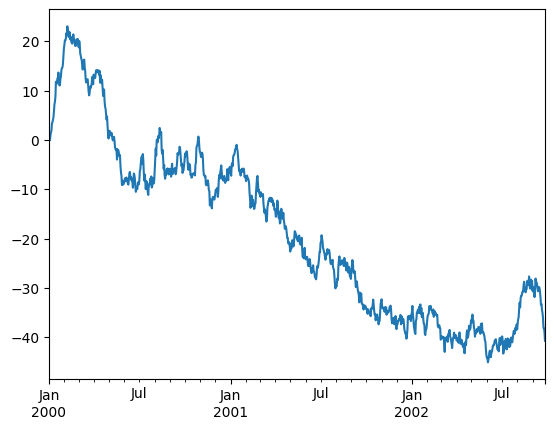

In [95]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

In [96]:
#If running under Jupyter Notebook, the plot will appear on plot(). Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.
plt.show();

In [97]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

<Figure size 640x480 with 0 Axes>

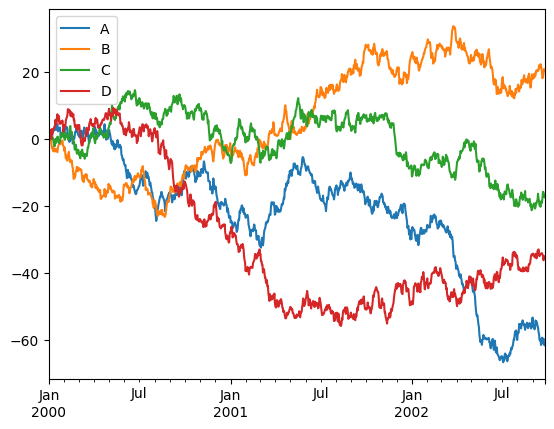

In [98]:
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

#Getting data in/out

In [99]:
df.to_csv("foo.csv")

In [100]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.761908,-1.047855,0.120704,1.535672
1,2000-01-02,-0.827905,0.749511,1.375371,2.418421
2,2000-01-03,1.535537,-0.153306,0.509479,2.775663
3,2000-01-04,0.702105,0.303041,1.252996,2.077829
4,2000-01-05,-0.093865,0.036926,-0.045505,0.758168
...,...,...,...,...,...
995,2002-09-22,-60.319017,18.527240,-15.727264,-34.691584
996,2002-09-23,-59.542979,19.532868,-15.926693,-36.175579
997,2002-09-24,-60.935150,20.877453,-16.794934,-34.934257
998,2002-09-25,-61.555724,20.455119,-17.436996,-35.032785


In [101]:
df.to_hdf("foo.h5", "df")

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [ ]:
pd.read_hdf("foo.h5", "df")

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

#Gotchas

In [ ]:
#if pd.Series([False, True, False]):
#    print("I was true")